In [47]:
import pandas as pd

In [98]:
tweets = pd.read_csv('Tweets.csv')

# Understanding the Data

In [49]:
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [50]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [99]:
tweets.dropna(subset=['text'], inplace=True)

In [100]:
tweets.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [101]:
#we're going to drop the columns we don't need, which are textID and selected_text columns
tweets.drop(['textID', 'selected_text'], axis=1, inplace=True)

In [102]:
tweets.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on the releases we already bought",negative
5,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral
6,2am feedings for the baby are fun when he is all smiles and coos,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe... (is that possible!?),positive


In [103]:
tweets['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [104]:
tweets['# of words'] = tweets['text'].apply(lambda x: len(str(x).split()))

In [105]:
tweets.groupby('sentiment')['# of words'].mean()

sentiment
negative    13.473204
neutral     12.343888
positive    13.109881
Name: # of words, dtype: float64

In [106]:
pd.set_option('display.max_colwidth', None)


In [107]:
tweets[tweets['text'].str.contains('lol', case=False, na=False)]

,text,sentiment,# of words
71,a celtics-lakers rematch sounds better don`t you think? lol,positive,9
87,"His snoring is so annoying n it keeps me from sleeping (like right now, lol) but I honestly wud miss it if it eva left I love him.",neutral,28
145,"I watched that too!!! I didnt want her to win, but she put up a good fight..lol",neutral,17
165,Had parent teacher thing yesterday!! So boring going to skl on saturday!! lol,negative,13
176,I miss my neice can`t wait to see her bad n grown ****! Lol,negative,14
...,...,...,...
27278,samee well i aint a man i am a girl obv nd i am 14 lol i aint no1 special or not famous or rich wish to be tho ****,neutral,30
27279,"i was watching Harpers Island, lol... there was no vodka involved",neutral,11
27410,in science class right now... urgh... stupid project.. don`t wanna go to track after school! too tired! lol,negative,18
27460,"Scream just played on my iPod. First thing that comes to mind, BEAR MACHINEEEEE!!!! Lol",neutral,15


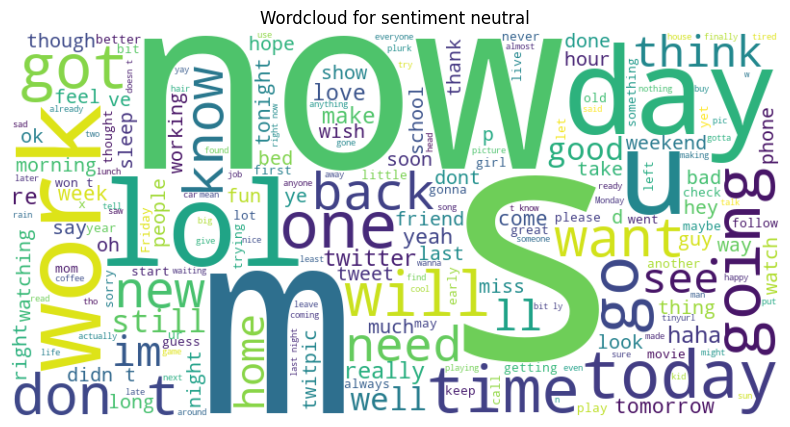

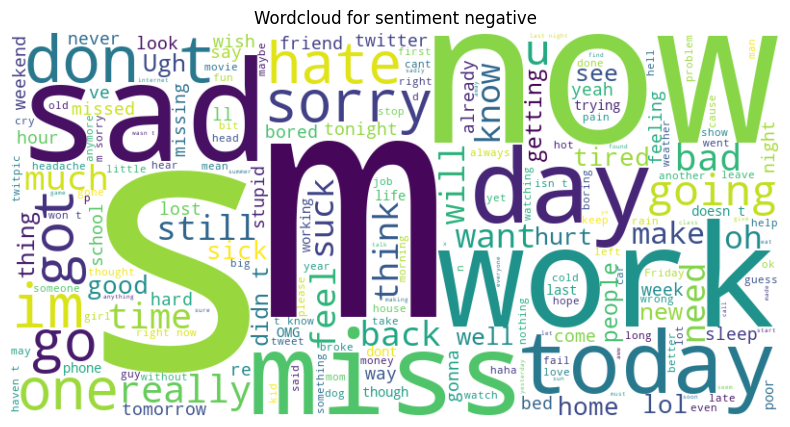

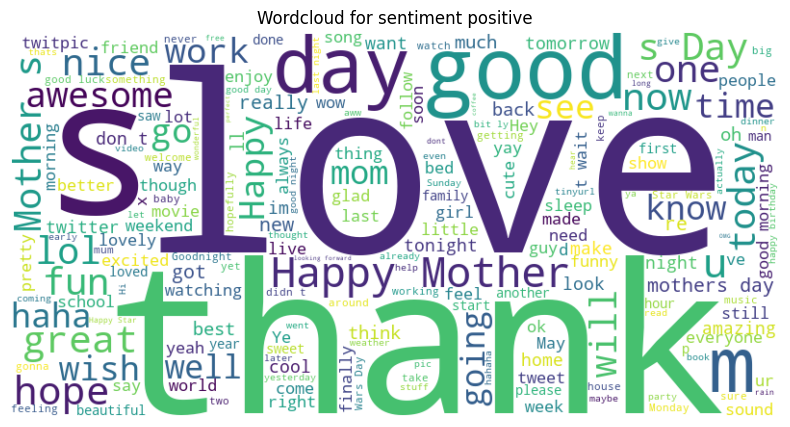

In [108]:
sentimientos = tweets['sentiment'].unique()

for sentimiento in sentimientos:
    texto = ' '.join(tweets[tweets['sentiment'] == sentimiento]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for sentiment {sentimiento}')
    plt.show()

In [ ]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))
extra_stopwords = {"lol", "omg", "haha", "lmao", "rofl", "fb", "flickr", "etc"}
stop_words.update(extra_stopwords)

slang_dict = {
    "u": "you", "ur": "your", "wanna": "want", "gonna": "going to",
    "aint": "am not", "nd": "and", "tho": "though", "no1": "no one",
    "wud": "would", "eva": "ever", "til": "until", "juz": "just"
}

def limpiar_texto(texto):
    texto = texto.lower()  
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto) 
    texto = re.sub(r'@\w+|\#', '', texto) 
    texto = re.sub(r'\d+', '', texto)  
    texto = re.sub(r'[^\w\s]', '', texto)  
    
    for word, replacement in slang_dict.items():
        texto = re.sub(r'\b' + word + r'\b', replacement, texto)

    doc = nlp(texto) 
    
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha]
    
    return ' '.join(tokens)  

tweets['text'] = tweets['text'].apply(limpiar_texto)


In [61]:
tweets['# of words'] = tweets['text'].apply(lambda x: len(str(x).split()))

In [62]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        27480 non-null  object
 1   sentiment   27480 non-null  object
 2   # of words  27480 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 858.8+ KB


In [63]:
tweets.head()

,text,sentiment,# of words
0,respond go,neutral,2
1,sooo sad miss san diego,negative,5
2,boss bully,negative,2
3,interview leave alone,negative,3
4,son could not put release already buy,negative,7


In [64]:
tweets['# of words'] = tweets['text'].apply(lambda x: len(str(x).split()))

In [65]:
tweets.groupby('sentiment')['# of words'].mean()

sentiment
negative    7.146639
neutral     6.484213
positive    7.195409
Name: # of words, dtype: float64

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

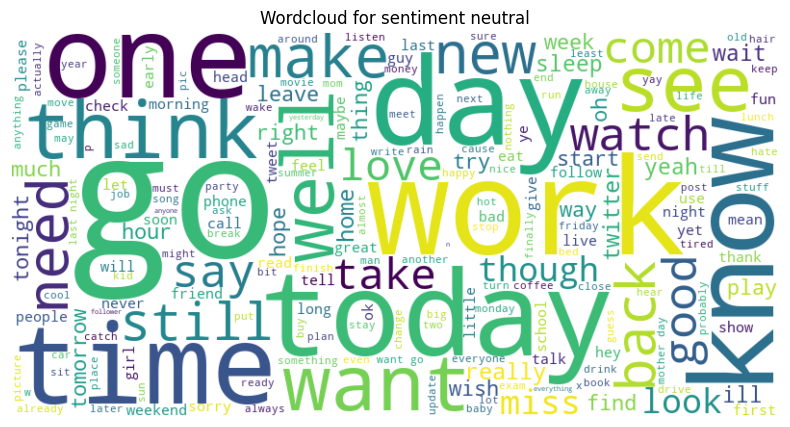

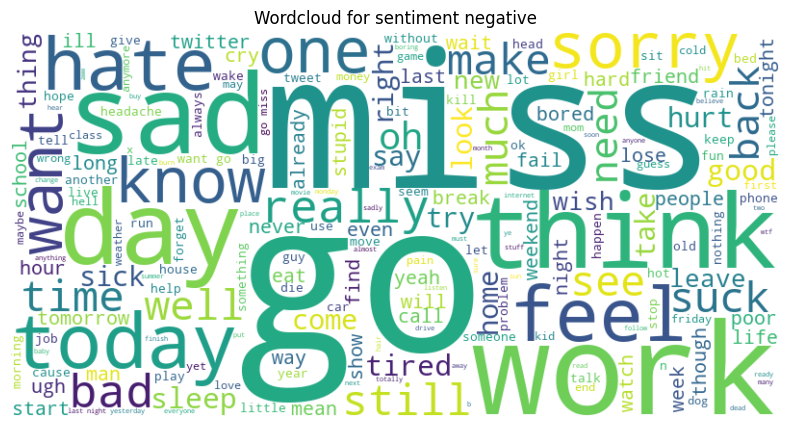

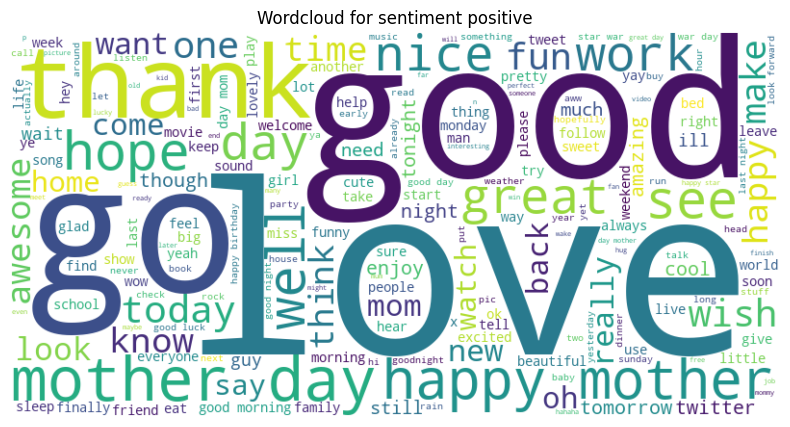

In [67]:
sentimientos = tweets['sentiment'].unique()

for sentimiento in sentimientos:
    texto = ' '.join(tweets[tweets['sentiment'] == sentimiento]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for sentiment {sentimiento}')
    plt.show()

In [68]:
tweets = tweets[tweets['# of words'] > 0]

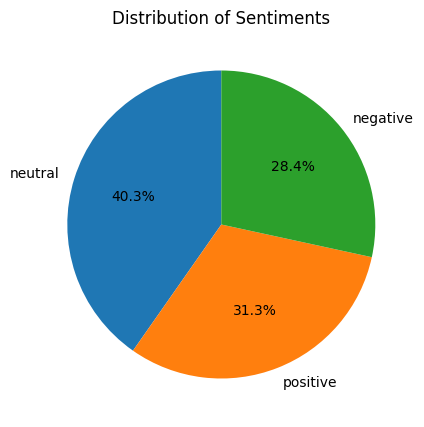

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(tweets['sentiment'].value_counts(), labels=tweets['sentiment'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

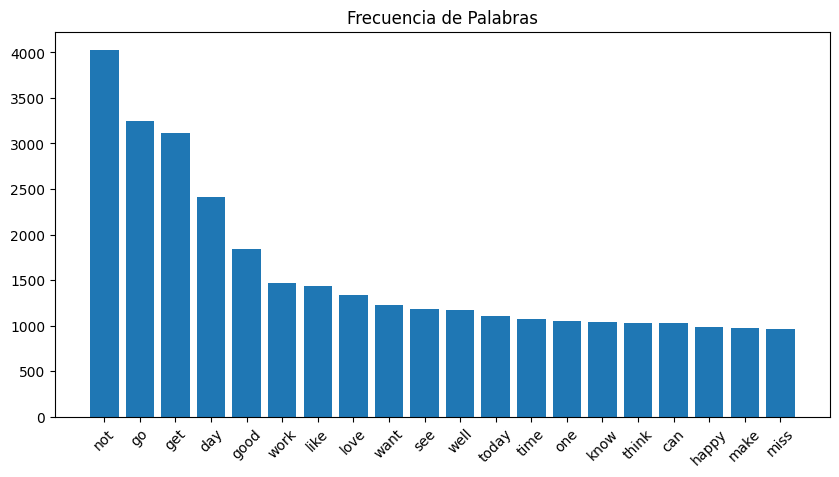

In [ ]:
from collections import Counter 
words = [word for tweet in tweets['text'] for word in tweet.split()]
word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

plt.figure(figsize=(10, 5))
plt.bar(common_words_df['word'], common_words_df['frequency'])
plt.xticks(rotation=45)
plt.title('Frecuencia de Palabras')
plt.show()


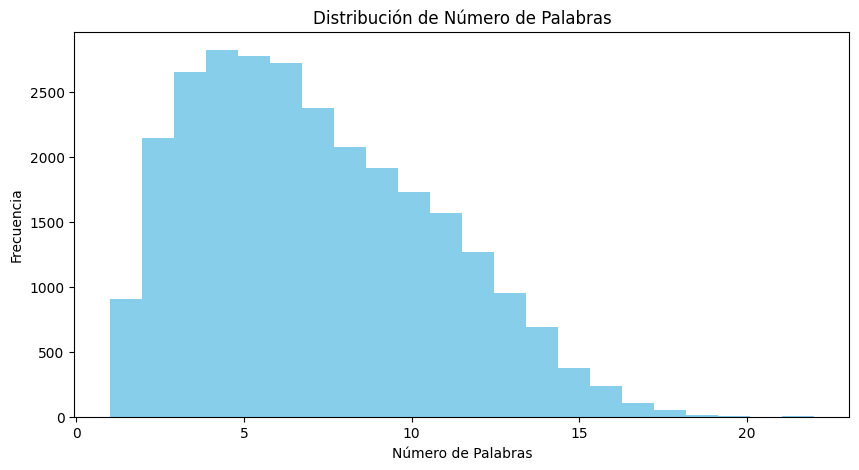

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(tweets['# of words'], bins=22, color='skyblue')
plt.title('Distribución de Número de Palabras')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [72]:
tweets.describe()

,# of words
count,27381.000000
mean,6.918812
std,3.730506
min,1.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,22.000000


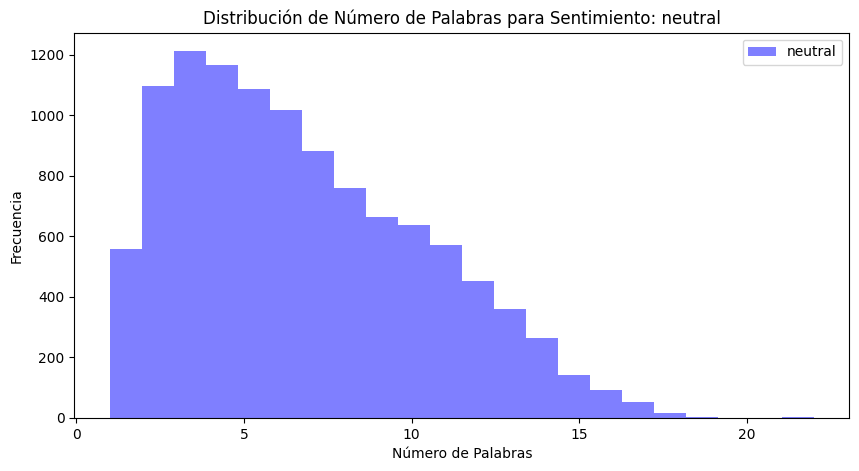

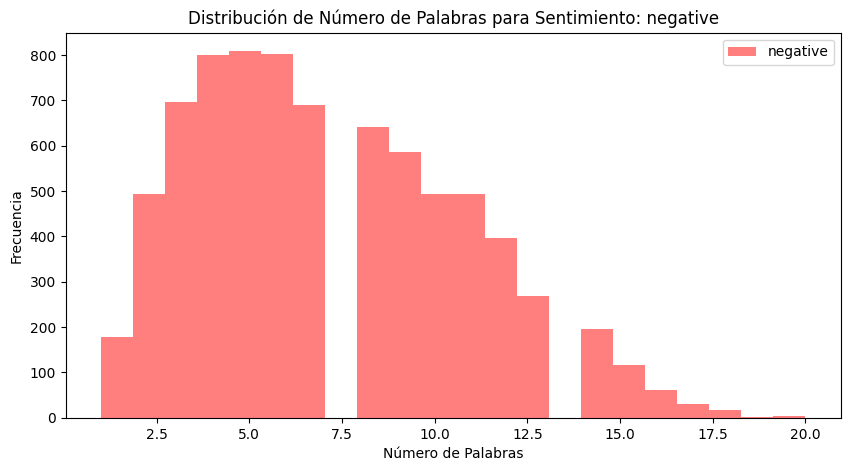

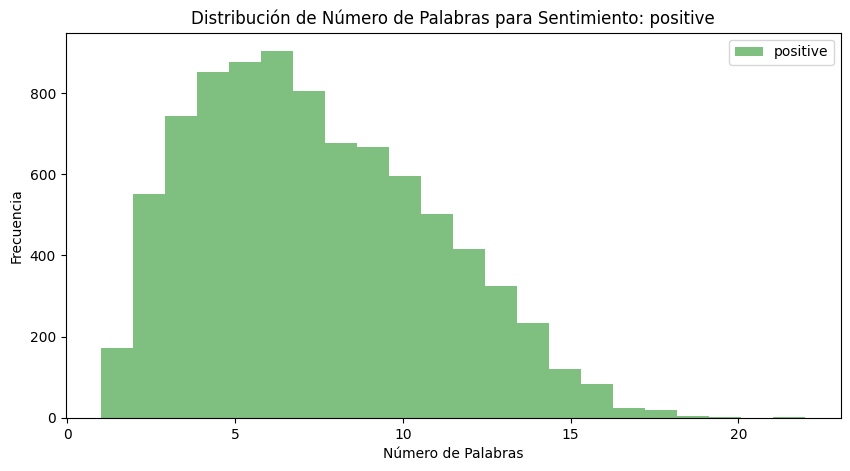

In [ ]:
sentimientos = tweets['sentiment'].unique()

colores = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

for sentimiento in sentimientos:
    plt.figure(figsize=(10, 5))
    plt.hist(tweets[tweets['sentiment'] == sentimiento]['# of words'], 
             bins=22, 
             color=colores[sentimiento], 
             alpha=0.5, 
             label=sentimiento)
    
    plt.title(f'Distribución de Número de Palabras para Sentimiento: {sentimiento}')
    plt.xlabel('Número de Palabras')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [74]:
for sentimiento in sentimientos:
    print(f"Estadísticas para el sentimiento: {sentimiento}")
    print(tweets[tweets['sentiment'] == sentimiento]['# of words'].describe())

Estadísticas para el sentimiento: neutral
count    11029.000000
mean         6.535951
std          3.811159
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         22.000000
Name: # of words, dtype: float64
Estadísticas para el sentimiento: negative
count    7777.000000
mean        7.150315
std         3.658086
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        20.000000
Name: # of words, dtype: float64
Estadísticas para el sentimiento: positive
count    8575.000000
mean        7.201283
std         3.647722
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        22.000000
Name: # of words, dtype: float64


# Model
before to create the model, we're going to understand what model we're going to use, and the parameters that we need to set.

## Model
We're going to use the `RandomForestClassifier` model, which is a ensemble model that uses decision trees as base models.

## Parameters

we're going to vectorize the text using the `TfidfVectorizer` class, that let us convert a collection of raw documents to a matrix of TF-IDF features for the understanding of the model, but firts we need to understand how many features we're going to use, and the parameters that we're going to set, for that we're going to analyze the words and decide how many features we're going to use.

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets['text'])

unique_words = len(vectorizer.get_feature_names_out())

print(f'Número total de palabras únicas en el corpus: {unique_words}')

Número total de palabras únicas en el corpus: 22937


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets['text']).toarray()
y = tweets['sentiment']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importancia_caracteristicas = model.feature_importances_

nombres_caracteristicas = vectorizer.get_feature_names_out()

importancia_df = pd.DataFrame({'palabra': nombres_caracteristicas, 'importancia': importancia_caracteristicas})

importancia_df = importancia_df.sort_values(by='importancia', ascending=False)

importancia_df['importancia_acumulada'] = importancia_df['importancia'].cumsum()

umbral_importancia = 0.98
caracteristicas_importantes = importancia_df[importancia_df['importancia_acumulada'] <= umbral_importancia]['palabra'].tolist()

print(f'Número de características seleccionadas: {len(caracteristicas_importantes)}')

vectorizer = TfidfVectorizer(vocabulary=caracteristicas_importantes)
X = vectorizer.fit_transform(tweets['text']).toarray()


Número de características seleccionadas: 11406


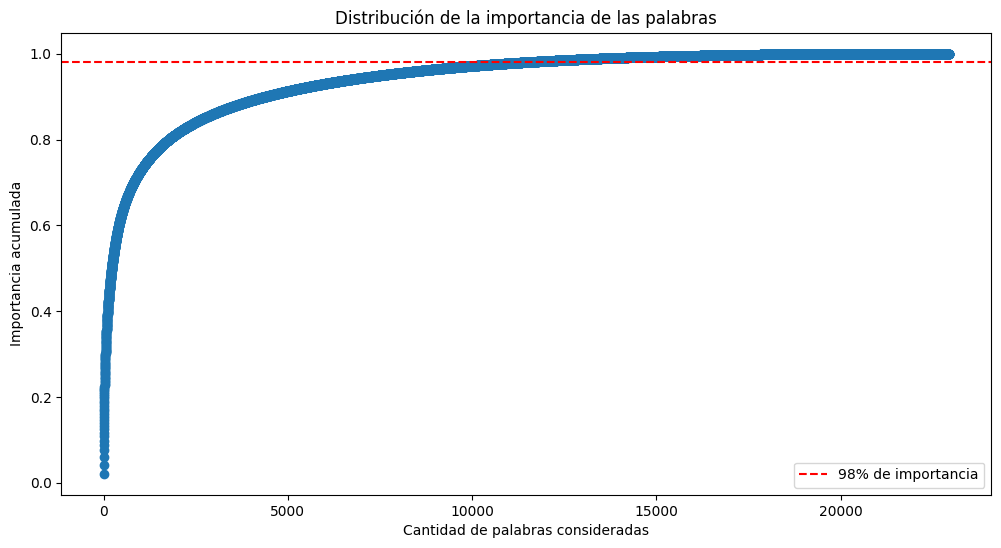

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(importancia_df)), importancia_df['importancia_acumulada'], marker='o')
plt.axhline(y=0.98, color='r', linestyle='--', label='98% de importancia')
plt.xlabel("Cantidad de palabras consideradas")
plt.ylabel("Importancia acumulada")
plt.title("Distribución de la importancia de las palabras")
plt.legend()
plt.show()

In [89]:
importancia_df.head(10) 

,palabra,importancia,importancia_acumulada
11707,love,0.020982,0.020982
19640,thank,0.019913,0.040896
7997,good,0.019423,0.060319
12711,miss,0.015045,0.075364
8606,happy,0.012931,0.088295
16964,sad,0.010046,0.098340
13805,not,0.009602,0.107943
8200,great,0.009109,0.117051
8667,hate,0.008036,0.125087
18331,sorry,0.007524,0.132612


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7029395654555414
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1547
     neutral       0.64      0.77      0.70      2232
    positive       0.79      0.72      0.75      1698

    accuracy                           0.70      5477
   macro avg       0.72      0.69      0.70      5477
weighted avg       0.71      0.70      0.70      5477



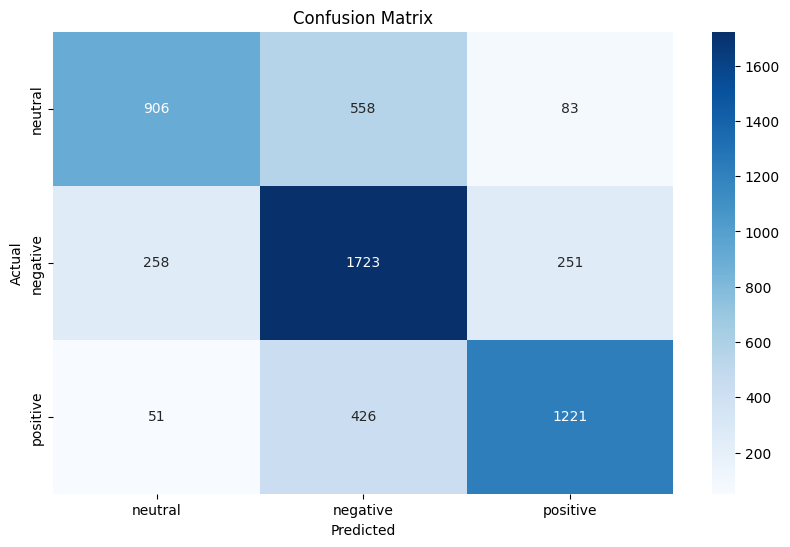

In [88]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentimientos, yticklabels=sentimientos)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=22937)
X = vectorizer.fit_transform(tweets['text']).toarray()
y = tweets['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7064086178564908
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1547
     neutral       0.65      0.76      0.70      2232
    positive       0.77      0.74      0.75      1698

    accuracy                           0.71      5477
   macro avg       0.72      0.70      0.70      5477
weighted avg       0.71      0.71      0.71      5477



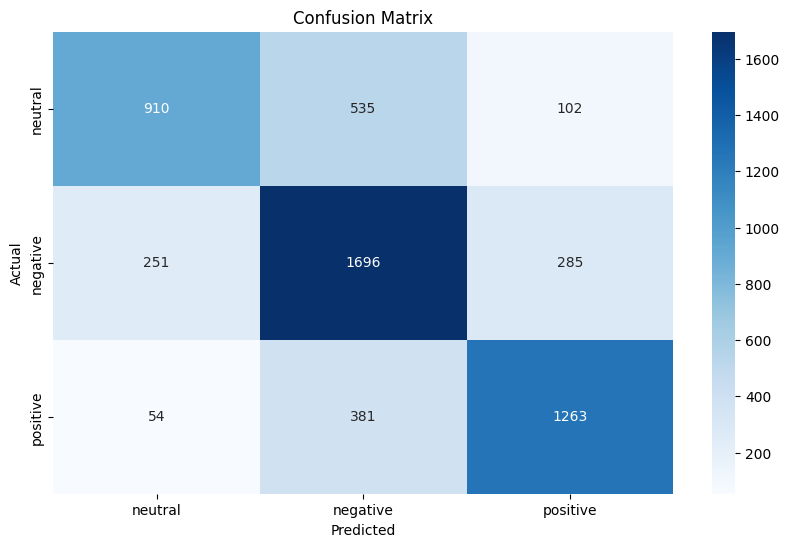

In [91]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentimientos, yticklabels=sentimientos)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
new_texts = [
    "The customer service was outstanding! I’ll definitely come back.",  
    "This is the worst experience I've ever had. Completely disappointed.",  
    "The product is okay, but I expected something better.",  
    "Absolutely love it! Worth every penny.", 
    "Terrible quality. It broke after one use.", 
    "Fast delivery and great packaging. Very happy with my purchase!", 
    "Meh, it’s neither good nor bad. Just average.",  
    "Fantastic experience, will highly recommend to my friends!",  
    "Not what I expected, but still usable.", 
]

X_new = vectorizer.transform(new_texts).toarray()
predicted_sentiments = model.predict(X_new)

sentiment_map = {0: "Negative", 1: "Positive", -1: "Neutral"} 

for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text} → Predicted Sentiment: {sentiment_map.get(sentiment, sentiment)}")



Text: The customer service was outstanding! I’ll definitely come back. → Predicted Sentiment: neutral
Text: This is the worst experience I've ever had. Completely disappointed. → Predicted Sentiment: negative
Text: The product is okay, but I expected something better. → Predicted Sentiment: neutral
Text: Absolutely love it! Worth every penny. → Predicted Sentiment: positive
Text: Terrible quality. It broke after one use. → Predicted Sentiment: negative
Text: Fast delivery and great packaging. Very happy with my purchase! → Predicted Sentiment: positive
Text: Meh, it’s neither good nor bad. Just average. → Predicted Sentiment: neutral
Text: Fantastic experience, will highly recommend to my friends! → Predicted Sentiment: positive
Text: Not what I expected, but still usable. → Predicted Sentiment: neutral


: 